In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


복잡한 시계열 분석은 statsmodel에서밖에 제공하지 않는다.
R보다 방대해짐
큰패키지-서브패키지-엘리먼트-
matplotlib - pylab(쉽게 사용할 수 있도록 도와주는 api) - plt
statsmodel - api()

import statsmodels.api as sm (대부분 이거 사용할 것)
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

책에 있는 내용이 구현이 다 안되서 계속 개발 되고 있는 패키지이다.

샘플 데이터 사용법에 대해서 배울 것

R에 사용하는 패키지들을 그대로 파이썬에서 사용가능할 수 있도록 하는 것이기 때문에 명령어들이 비슷하다.

R 데이터 가지고 온다. 모두 가지고 오기 힘드니까 로드해서 임포트 해오는 형태로 되어있다.

샘플 코드 R에서 가지고 온 것이라서 그대로 사용하면 안된다.
시계열 분석시 R에서 많이 가지고 와서 연습할 것

data, doc 두가지가 있다.

In [2]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

In [5]:
data.data

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
5,2nd,Female,Child,No,0
6,3rd,Female,Child,No,17
7,Crew,Female,Child,No,0
8,1st,Male,Adult,No,118
9,2nd,Male,Adult,No,154


In [6]:
data.__doc__

'+---------+-----------------+\n| Titanic | R Documentation |\n+---------+-----------------+\n\nSurvival of passengers on the Titanic\n-------------------------------------\n\nDescription\n~~~~~~~~~~~\n\nThis data set provides information on the fate of passengers on the\nfatal maiden voyage of the ocean liner ‘Titanic’, summarized according\nto economic status (class), sex, age and survival.\n\nUsage\n~~~~~\n\n::\n\n    Titanic\n\nFormat\n~~~~~~\n\nA 4-dimensional array resulting from cross-tabulating 2201 observations\non 4 variables. The variables and their levels are as follows:\n\n+----+----------+---------------------+\n| No | Name     | Levels              |\n+----+----------+---------------------+\n| 1  | Class    | 1st, 2nd, 3rd, Crew |\n+----+----------+---------------------+\n| 2  | Sex      | Male, Female        |\n+----+----------+---------------------+\n| 3  | Age      | Child, Adult        |\n+----+----------+---------------------+\n| 4  | Survived | No, Yes             

In [7]:
data = sm.datasets.get_rdataset("precip")

In [8]:
data

<class 'statsmodels.datasets.utils.Dataset'>

In [ ]:
# 호르몬 : 조금 느리게 움직여서 위에나 아래에 조금 머물러 있는 시간이 오래 있어서 자기가 있는 값 근처 값이 예측 된다.
# 호흡기 질환 사망자 : 예측이 잘 된다. 계절적 요인을 가지고 있다.
# 항공 운송 데이터 : 예측 잘 된다. 
# 문제 자체가 예측이 잘 되냐 안되냐에 따라서 예측이

- - -
### Scikit-Learn 패키지 소개


In [ ]:
연구자들 사이에서 python 사용량이 늘어나서 공학 및 수학 분야들을 파이썬으로 옮겨 만들면서 scikit 시리즈 많이 만들어졌지만
지금까지 잘 사용되는 건 scikit learn, 교육용으로 만들어진 것이라 대부분의 것 다루고 있다.

비지도학습 : x 데이터만으로도 분석 할 수 있도록
    
load : 패키지 다운로드 시 함께 다운로드 
fetch : 용량 너무 커서 인터넷으로 다운로드, 한번 cash dir로 다운받고 로드해서 사용한다. 한번만 인터넷 연결되면 된다.
make : 특성을 가진 가상의 데이터 필요할때 만들어주는 명령
    
Bunch안에 필수로 들어있다 이거 두개 (data, target,) feature_name, target_name, DESCR(documentation)

x, y 데이터 자체만 있고 feature_name 문자열 리스트

In [9]:
from sklearn.datasets import load_boston
boston = load_boston() # boston : bunch 
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

load한 data frame 형태로 만들어서 사용할 것
x, y 를 하나의 df로 만들어서 분석하는 경우가 많아서 두개를 붙인다.
MEDV라는 것 
1. 데이터를 눈으로 본다. 머리나 꼬리를 끊어서 본다. tail() : 데이터 갯수를 알 수 있다.
2. 깨끗하게 정리되어서 나오지 않는다. 구멍이 뚫리거나 미렬있거나, 글자가 들어 있거나 하나씩 보면서 정리한다. cleaning 해야한다.
3. 실수/카테고리 값인지 알아야 한다. 카테고리값을 숫자로 적어놓은 것도 있어서 숫자로 인식 할 수도 있기 때문에 0, 1 이런 값들 카테고리일 가능성 있기 때문에 판단해야한다.
4. 전체 분포가 어떤 모양을 가지는지, 평균, 분산 describe 명령 사용하면 대략적으로 어떤 데이터인지 그림을 그려야 한다.
5. 1000개 넘으면 하나씩 보기 힘드니까 describe를 통해서라도 봐야하고 시간내서 최대한 많이 뜯어보려고 노력해야한다.
6. describe 의 count 데이터 구멍 난 것 - 2가지 방법 (채우거나, 버리거나) 중요하면 채우고 여러 상황을 봤을 때 버려도 되면 버리고
7. 평균mean 분산std 4분위 수를 봐야 전체 모양이 잡힌다. min~ 77% max  시멘트릭한가 아닌가 알 수 있다. 더 알고 싶으면 히스토그램 그려보면 알 수 있다. 대부분 하나씩 히스토그램을 그리는데
8. 모두 그리기 힘들때 pairplot 사용한다. columns 너무 많으면 잘라서라도 다 봐야한다. pairplot의 upper triangle만 보면된다 대칭이라서 특징들을 노트해 놓는다. 또한 숫자랑 같이 봐야한다. 히스토그램 (정규분포, 시매트릭, 바운딩(어디가 막혀있는 데이터인지 알아야한다. 가격 0보다 작은값없다.))
9. correlation coefficient 대충 생각해봐야하고, 휘어져 있는지 아닌지 봐야한다.(선형인가 아닌가) 변수 변환을 통해서 선형으로 바꿀 수 도 있다.
10. outlier 의 유무 다른 데이터랑 어울리지 않는 것 pairplot의 3,4 번째 애들 

In [ ]:
target name 없으면 xn 으로 집어넣는다.
일직선으로 나오는 것 카테고리 데이터

In [11]:
import pandas as pd

In [12]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import matplotlib.pylab as plt

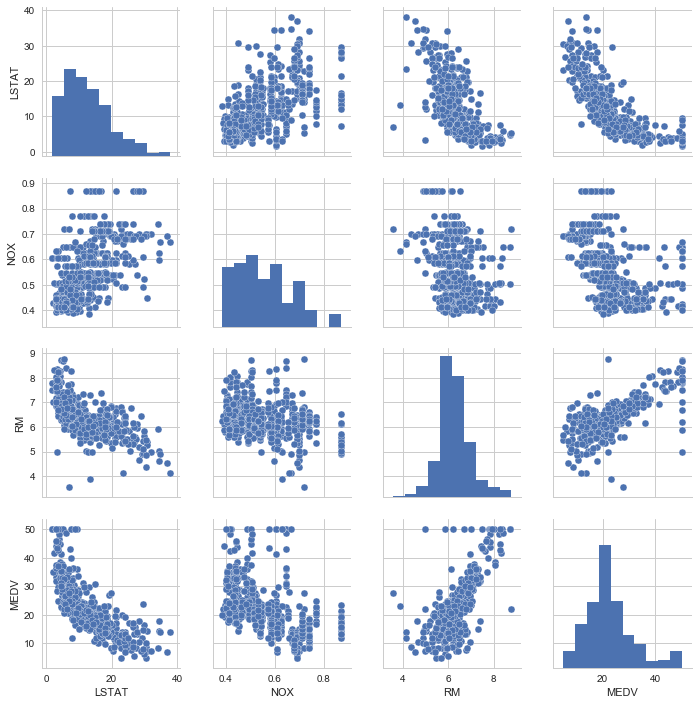

In [18]:
cols = ["LSTAT","NOX","RM","MEDV"]
sns.pairplot(df[cols])
plt.show()

- - -

### 당뇨병 데이터

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns = ["x%d"%(i+1) for i in range(diabetes.data.shape[1]]),
                                                    ])

In [ ]:
df 개념적으로 dictionary of column series
loc[숫자 or 문자,숫자or 문자]
iloc[숫자, 숫자] 숫자로 반드시 사용해야
ix[]문자나 숫자로 많이 사용해도 된다. ix 앞을 없애기로 해서 위에 두개를 사용하는 것이 좋다.

#### 가상 데이터 생성 방법


In [ ]:
make_regression() x, y데이터를 함께 만들어 준다. feature matrix, target vector 를 함께 만든다.
y = b(0나온다고 y가 0 나오진 않으니까) + wx  + \epsilon(오차로 뭉뚱거린다.) 

잔차 : e (분석한 결과에서)
오차 : \epsilon disturbance x가 아닌 모든 영향을 뭉뚱그려 놓은 것 계산 할 수 없다. 정규 분포라고 가정한다.
    중심 극한 정리에 의해 정규분포라고 가정
    
y=b1+Xw+ϵ 데이터 여러개의 경우

make_regresssion() 실행하면 우측의 값 다 만든다.

w 자기마음대로 만들지만

n_targets 보통 안쓴다.

bias : b값은 사람이 넣어주는 것으로 코드가 되어있음

noise : disturbance 의 standard deviation 를 얼마나 크게 넣어줄지를 정한다. 0은 noise 가 0이고 직선이 나온다.
    0이면 x말고는 다른 영향 없다는 것 
    
coef : True로 해서 w값 무엇인지 알아낸다.
    
seed : random으로 만들어내서 seed값을 필요로 한다.

    
bias : 100 넣으면 x가 0일때 
    


In [ ]:
n feature, coef 안넣는다.

In [19]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias =0, noise=0, coef=True, random_state=0)
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [20]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [21]:
w

array(79.17250381)

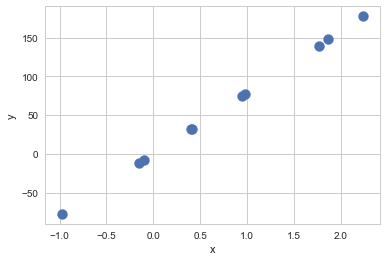

In [22]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

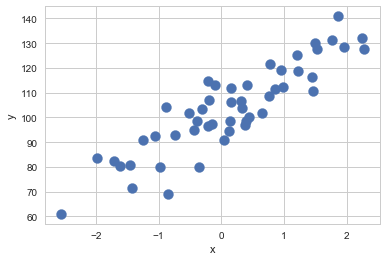

In [23]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [27]:
import numpy as np

In [53]:
def make_regression2(n_samples=100, bias=0.0, noise=0.0, random_state=None):
    random_state = np.random.seed(random_state)
    X = np.random.randn(n_samples)
    w = np.random.randn(1)* randint(10)
    e = np.random.randn(n_samples) * noise
    y = bias + X * w + e

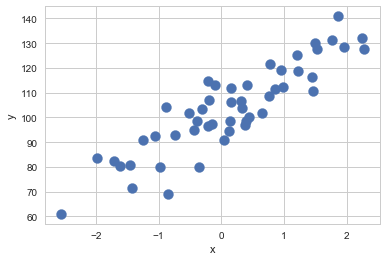

In [54]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### 독립변수가 여러개인 경우

In [ ]:
x 값이 feature이고, 명암이 sample 
x 값이 바뀌면 y의 분포가 바뀌는가를 봐야한다.
x1 값이 커지면 희미해진다. 분포가 바뀌었다.

연관이 없는 애들도 섞이도록 n_informative = 1 독립변수 중에서 실제 상관관계가 있는 갯수

x 간의 상관관계가 있는지 살펴보는 것  eff rank, tail st 

feature  = 4 이고 eff rank = 2 이면 fea중 2개만 independant, 나머지는 변형해서 만든 것

원래는 섞여서 돌리면 에러가 난다.

회귀분석은 w를 찾아내는 작업인데 같은 갓

y = w1x1 + w2x2 + w2`x2`
이렇게 모르고 들어가게 되면 
w2와 w2`를 어떻게 분배해야 할지 모른다 다 가능
원래 w2 = 10이면 1, 9 가능, 5,5 가능

종속인 애가 단 하나라도 섞여서 들어가면 무한대의 해가 나와서 구할 수가 없다.

X1 = X2 
X1비슷X2 한 경우? 에러는 안나고 답은 나오는데 w가중치 값이 정확한 답이라고는 말하지 못한다
오차가 있고, overfitting 되어 있다. correlation 너무 강하면 버려야한다. 버리기 아까우면 pca 변형시켜서 쓰레기같은 데이터만 

독립인 애들만 남을때까지 버려야한다. 다중 공선성 tail_strength

x 들 간의 correlation의 세기를 조절 가능하다.










### 선형 회귀분석의 기초


x 값을 집어넣었을 때 y를 예측하는 것
함수를 수식으로 찾아낼 것 - 여러가지 함수중에 하나 선택할 것인데
- 가장 간단한 선형 조합으로 이루어지는 함수를 선택(선형 모형)

선형이 아닌 다른 함수를 선택하면 (비선형 회귀분석) : 잘 사용하지 않는다. 구하기도 힘들고 분석하기도 힘들다.

    
#### 바이어스 오그멘테이션 

w0라는 애를 넣어서 x 0넣어도 y가 0안되게 만든다.    

feature에 가짜 feature를 하나 집어넣는다. 1 가짜로 집어 넣는다. 붙이는 작업이라 augmentation 이라고 한다.

나중에 w0 계산해주기 위해서!

바이어스 오그멘테이션 항상 반드시 해줘야한다.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

x가 0이면 y는 반드시 0이라는 자연법칙이 있다는 것을 알면 오그멘테이션 하지 않아도 된다.

feature벡터의 항상 앞줄은 1이다.!!!!!!!! 직접 augmentation 해줘야한다.

`add_constant`



In [56]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

# feature 2개, 샘플 갯수 100개인 X 에 1을 앞에 붙여줘야한다. w0를 곱해주기 위해서

In [57]:
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [58]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

`sm.add_constant(feature matrix)` 이용해서 앞에 1을 붙여줄 수 있다. 

#### OLS (Ordinary Least Squares)

- 가장 지본적은 결정론적 선형 회귀방법으로 잔차 제곱합을 최소화가는 가중치 벡터를 행렬 미분으로 구하는 방법이다.

- RSS를 미분해서 0인 벡터를 만드는 w를 찾는 것!!! 

f(x)를 만드는 것인데 함수 모양은 선형으로 결정했고
계수 w를 구하면 된다.

w를 가정하면 이런 식이 나온다.
y = Xw
e = y - y^ = y - Xw

잔차 벡터의 크기가 작을수록 좋은 것
잔차 벡터의 크기를 작게 하면 w값을 구하는 것

norm 벡터의 크기 구하고

residual sum of square = ee

잔차 제곱합이 가장 작게 만드는 w를 구한다. optimization
gradiant vector가 0이 되게 미분
w구할 거니까 w로 미분

X.T, X = 정방행렬

식의 2가지 의문점

1. gradient 가장 위의값 될 수도 있다.
2. 역행렬 존재?? 

X.T X가 곧 헤시안 = 양수 이면

X.T, X 파지티브 데피닛 양수
X 메트릭스 안에 종속인 것이 아무것도 없으면 = 모두 독립인 경우에
inv 존재하지 않아서 w 구할 수 없었던 것


#### 정규방정식 normal equation 아주 중요!!!!!! 

X.T e = 0 이면

X와 e가 직교한다.***** 중요하다!!!!!


- y¯=wTx

- 왜 중요? : 회귀 분석 전에 전처리 해서 scaling 하게 되는데 그 값이 변하게 되어도 w 값은 변하지 않는 다는 것을 증명해 줌


#### 실제로 plot으로 그려보기

- 빨간색 선을 그리는 방법 알아야 한다!!!!

In [59]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression().fit(X0, y)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [67]:
model.coef_

array([[81.59750943]])

In [68]:
model.intercept_

array([102.02701439])

In [ ]:
predictions = model.predict(model)

In [60]:
coef

array(80.71051956)

In [61]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T),y)
w

array([[102.02701439],
       [ 81.59750943]])

In [62]:
# lstsq 명령 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[102.02701439],
       [ 81.59750943]])

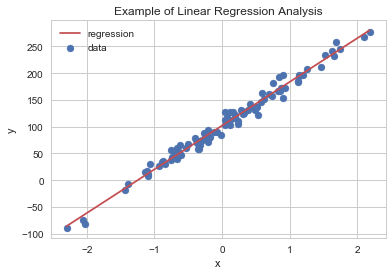

In [64]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

### scikit learn 패키지를 사용한 선형 회귀분석

In [ ]:
# 철학이 달라서 명령어가 좀 다르다.
from sklearn.linear_model import LinearRegression

coef_ : 가중치 벡터, 
    
y, y^을 이용해서 scatter plot 이용
완벽하게 예측하면 regression line위에 놓인다.

# 객체 자체가 나온다. 속성이 추가된 상태로 출력됨 model.fit(X,y)

# 원래 

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)


#### StatsModels를 사용한 선형 회귀분석

- `OLS`클래스 사용
- 객체 만들 때 데이터를 가지고 모델을 만든다.
- 데이터 만드는 순서 scikit과 다르다. y, X
- augmentation 직접 해줘야한다.


result = model.fit()
객체 자기자신을 출력하지 않고 다른 객체를 출력한다.
분석을 위한 리포트로 보여주는 매서드도 가지고 있는 조금 더 큰 범위이다.

- 주의 !!!!x_new 넣을 때 augmentation 해서 같은 포맷이 되게 집어넣어야 한다.

- dataFrame 넣어도 된다. df 넣는 것이 리포트 만들때 columns 이름 사용해서 더 좋다. df사용!!

##### report 해석

coef가 실제 자연법칙과 얼마나 차이나는지를 std로 알려준다. +- 사이에 있을 것이다.

test statistics 
p-value

귀무가설 coef가 0이다. 해당 컬럼이 집값과 관련이 없다.라는 귀무가설 pvalue 작아서 기각되면

- 인사이트 하나하나 얻기 위해서는 StatsModels 써야한다!!!

- prediction할때도 model 만들 때와 같이 df로 넣어줘야한다.

- report에 있는 모든 숫자 값들을 개별적으로 access가능하다! doc 참고

- 다른 컬럼 값들이 더 크게 영향을 미치면 하나의 컬럼과 결과가 실제와 다르게 반영이 될 수 있어서 다른 컬럼들의 영향을 제외한 다음에 둘만의 상관관계를 판단해야한다! 그대로 믿으면 안됨!!!! 

MEDV : 실제
fitted : 예측
선 : 오차범위

오차범위를 벗어난 아이들은 이 모형과 맞지 않고 outlier이라고 한다.

1,2 residual 분석 : x 가 달라져도 분포가 달라지지 않는 것이 좋다.

잔차와 x값이 상관관계가 있으면 안된다.
상관관계 있는 것 만큼 뽑아내는 것 인데 상관관계 있으면 아직 최적의 w뽑아내지 않은 것이고 > 선형 모형을 쓰면 안되나?라는 생각 할 수 있다.

- 다항 회귀